### 관련 자료들 불러서 설치하기

In [116]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [117]:
import pandas as pd
from collections import Counter
from konlpy.tag import Kkma
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
from konlpy.tag import Okt

In [118]:
from konlpy.tag import Okt

In [119]:
Kkma=Kkma()

### 데이터 읽기 및 확인 

In [212]:
Data=pd.read_csv("news_text.csv")
Data.index= Data["Date"]
Data.drop("Date",axis=1, inplace= True)
Data.index = pd.to_datetime(Data.index)
Data.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-02', '2020-01-02',
               '2020-01-02', '2020-01-02', '2020-01-02', '2020-01-02',
               '2020-01-02', '2020-01-02',
               ...
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30'],
              dtype='datetime64[ns]', name='Date', length=6120, freq=None)

In [213]:
Data.head()

,text
Date,
2020-01-01,[유럽증시] 올해 마지막 거래일 소폭 약세로 마무리 영국 런던 증권거래소 [EPA=...
2020-01-02,"[Asia마감]中, 5년 만에 가장 화끈했던 첫날 [머니투데이 김수현 기자] 새해를..."
2020-01-02,[유럽개장]상승세 출발…英 0.68%↑ [아시아경제 유제훈 기자] 2일(현지시각) ...
2020-01-02,[채권마감]1월 금통위 전까지 관망 [머니투데이 배규민 기자] 국고채 금리가 일제히...
2020-01-02,"[시황종합] 첫날 코스피 2170선 후퇴…""기관 차익실현"" 코스피 1.02% 내린 ..."


In [215]:
# 대소문자 구분하기 때문에 모두 소문자로 변환
Data["text"]=Data["text"].str.lower()
#같은 의미의 단어 하나로 통일 
Data["text"] = Data["text"].str.replace(
    "kospi","코스피").str.replace(
    "kosdaq","코스닥").str.replace(
    "bitcoin", "비트코인").str.replace(
    "코로나19","코로나").str.replace(
    "머니데일리","").str.replace(
    "기자","").str.replace(
    "아시아경제","").str.replace(
    "특파원","").str.replace(
    "이데일리","").str.replace(
    "머니투데이","").str.replace(
    "한국경제","").str.replace(
    "뉴시스","").str.replace(
    "코로나바이러스","코로나").str.replace(
    "신종 코로나바이러스","코로나").str.replace(
    "신종 코로나","코로나").str.replace(
    "사진","").str.replace(
    "제공","").str.replace(
    "이미지","").str.replace(
    "파이낸셜뉴스","").str.replace(
    "연합뉴스","").str.replace(
    "하다","")

In [226]:
#stop_words
stop_words= ["기자","2020","2021","머니데일리","서울경제","현지시간","머니투데이","굿모닝 증시","머니투데이 뉴욕","특파원","연합뉴스",
             "이데일리","아시아경제","원","달러","이상배","뉴시스","파이낸셜뉴스","굿모닝","모닝 브리핑","외환브리핑","하다","되다","보이다",
             "종합","현지 시간","현지","시간","현지시간","유럽 증시","유럽","증시","오전","경제","서울","마감","대다","비즈","조선","뉴욕","뉴욕증시",
            "외환 브리핑","브리핑","임동욱","최정희","이민지"]

In [227]:
okt = Okt()
# tokenizer : 문장에서 색인어 추출을 위해 명사,동사,알파벳,숫자 정도의 단어만 뽑아서 normalization, stemming 처리하도록 함
def tokenizer(raw, pos=["Noun","Verb"], stopword=stop_words):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   
            stem=True    
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

token_list= []
for row in Data["text"]:
    tokenized_text = " ".join(tokenizer(row))
    token_list.append(tokenized_text)

In [228]:
Data=pd.DataFrame(token_list)
Data.columns = ["text"]
Data

,text
0,올해 마지막 거래 약세 마무리 영국 런던 증권 거래소 자료 런던 박대 주요 약세
1,가장 첫날 김수현 새해 맞다 중국 광둥성 모습 아시아 주요 상승세 보이 새해
2,개장 상승세 출발 유제훈 시각 일제 상승세 출발 영국 지수 전장 오른 독일 지수
3,채권 금통위 관망 규민 국고 금리 일제 하락 금융통화위원회 기준금리 인하 가능성 확...
4,첫날 코스피 후퇴 기관 차익 실현 코스피 리다 코스닥 오른 환율 오른 서다 뉴스
...,...
6115,수에즈 운하 통행 재개 보합 출처 보합 독일
6116,백악관 김정은 만날 의향 김여정 대통령 연설 비난 모닝 백악관 바이든 김정은 만날 ...
6117,일일 펀드 동향 국내 채권 펀드 하루 유입 국내 채권 펀드 시장 하루 자금 유입 돼...
6118,마진콜 사태 우려 다우 최고 일리 국제 금융시장 크레디트 스위스 하락 막판 상승 증...


In [229]:
Data_high_score=Data
Data_high_score=Data_high_score.reset_index(drop=True)
Data_high_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6120 non-null   object
dtypes: object(1)
memory usage: 47.9+ KB


### centrality 뽑아내기 & stopword 

In [272]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w]+")

count={}
for line in Data_high_score["text"]:
    #words=line.lower()
    tokens=tokenizer.tokenize(line)
    stopped_tokens=[i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2=[i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b:
                count[b, a]=count.get((b, a),0)+1
            else :
                count[a, b]=count.get((a, b),0)+1
df=pd.DataFrame.from_dict(count, orient='index')

list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

In [231]:
df2=pd.DataFrame(list1,columns=["term1","term2","freq"])
df3=df2.sort_values(by=["freq"],ascending=False)
df3_pos=df3.reset_index(drop=True)
df3_pos.head()

,term1,term2,freq
0,상승,코스피,572
1,거래,지수,534
2,코스닥,코스피,517
3,코로나,확산,512
4,상승,지수,506


- degree centrality : 연결된 모든 노드 갯수 기준 중심성
- betweenness_centrality : 매개 중심성
- closeness_centrality : 근접 중심성
- eigenvector_centrality : 고유벡터 중심성, 주요 노드와의 연결성 

In [232]:
import networkx as nx
import operator

import numpy as np
G_pos=nx.Graph()

for i in range((len(np.where(df3_pos['freq']>10)[0]))):
    G_pos.add_edge(df3_pos['term1'][i], df3_pos['term2'][i], weight=int(df3_pos['freq'][i]))

dgr = nx.degree_centrality(G_pos)
btw = nx.betweenness_centrality(G_pos)
cls = nx.closeness_centrality(G_pos)
egv = nx.eigenvector_centrality(G_pos)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(10):
    print(sorted_dgr[x])

print("** betweenness **")
for x in range(10):
    print(sorted_btw[x])

print("** closeness **")
for x in range(10):
    print(sorted_cls[x])

print("** eigenvector **")
for x in range(10):
    print(sorted_egv[x])

** degree **
('코로나', 0.5602165087956699)
('상승', 0.5575101488497971)
('하락', 0.5115020297699594)
('미국', 0.4952638700947226)
('코스피', 0.4654939106901218)
('지수', 0.4167794316644114)
('거래', 0.32882273342354534)
('주요', 0.2503382949932341)
('코스닥', 0.2476319350473613)
('우려', 0.2273342354533153)
** betweenness **
('코로나', 0.1922413909904429)
('미국', 0.14194161197140226)
('상승', 0.13838349343338918)
('코스피', 0.12919351820373315)
('하락', 0.09618079067827727)
('지수', 0.05336550324337442)
('거래', 0.035739221916199305)
('코스닥', 0.03345361754156508)
('개장', 0.017139816070101548)
('외환', 0.016137285991048255)
** closeness **
('상승', 0.6876967552959238)
('코로나', 0.6844772011980964)
('하락', 0.6627576163912664)
('미국', 0.6544508960425846)
('코스피', 0.634567405277402)
('지수', 0.6200353272939498)
('거래', 0.5843498408309888)
('코스닥', 0.5496403390071932)
('우려', 0.5484033389944238)
('주요', 0.544725522264953)
** eigenvector **
('상승', 0.17976587678961578)
('하락', 0.1746701146482134)
('코로나', 0.17378149407835775)
('지수', 0.164219122048

## 명사추출 

In [235]:
high_score_reviews=[]
for i in range(len(Data_high_score)):
    try:
        high_score_reviews.append(Kkma.nouns(Data_high_score["text"][i]))
    except Exception as e:
            continue

high_score_reviews[1:2]

6120

In [236]:
def flatten(l):
    flatList=[]
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

In [237]:
high_score_reviews=flatten(high_score_reviews)
high_score_reviews=[x for x in high_score_reviews if len(x)>1]
high_score_reviews=[x for x in high_score_reviews if not x.isdigit()]
# 상위 50개 단어 frequency 뽑기 
pd.Series(high_score_reviews).value_counts().head(50)

지수       1819
상승       1798
하락       1604
코로나      1585
코스       1583
코스피      1513
미국       1346
거래       1307
시장        962
코스닥       847
주요        718
포인트       677
환율        675
국내        623
대비        615
외환        593
금융        587
아시아       569
우려        565
확산        553
개장        546
외국인       535
기관        528
뉴스        522
일제        518
거래소       517
증권        513
마켓        498
보이        486
회복        486
리다        474
부양책       467
대감        461
국제        453
매수        447
개인        443
경기        440
최고        432
영국        421
연속        397
감염증       395
코스피지수     394
상승세       390
오후        384
투자        384
전망        381
중국        379
펀드        376
은행        371
급락        355
dtype: int64

In [238]:
def __array__(self):
    """Convert to numpy array.
    Returns 
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    return np.array(self.to_image())


font_path="C:\Windows\Fonts\Malgunbd.ttf"

In [239]:
wordcloud=WordCloud(font_path=font_path,stopwords = stop_words ,width=1280, height=768, 
                    background_color="white")

In [241]:
wordcloud=wordcloud.generate_from_frequencies(Counter(high_score_reviews))
array=wordcloud.to_array()

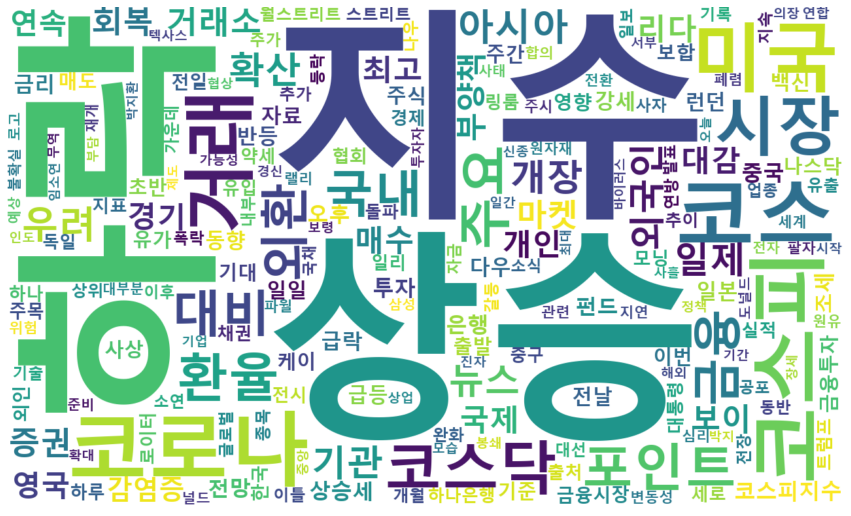

In [242]:
fig=plt.figure(figsize=(15,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.show()

### 특정 단어가 있는 문장 확인하기 

In [243]:
# 특정 단어가 있는 문장 확인하기 
# [x for x in Data_high_score['text'] if "코로나" in x]

## 토픽 모델링 

In [245]:
from gensim import corpora, models
import gensim


high_score_reviews=[]
for i in range(len(Data_high_score)):
    try:
        high_score_reviews.append(Kkma.nouns(Data_high_score["text"][i]))
    except Exception as e:
        continue
        

In [246]:
high_score_reviews=[[y for y in x if not len(y)==1] 
                    for x in high_score_reviews]
dictionary=corpora.Dictionary(high_score_reviews)
corpus=[dictionary.doc2bow(text) for text in high_score_reviews]

### 갯수 선정(perplexity) 

In [249]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,15):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

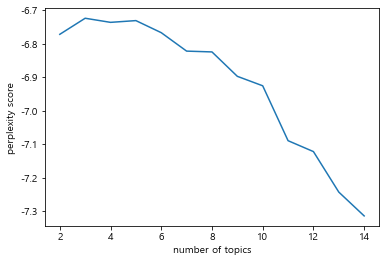

In [250]:
x=range(2,15)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

### 갯수선정(coherence)

In [251]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda=CoherenceModel(model=ldamodel, texts=high_score_reviews, dictionary=dictionary,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)



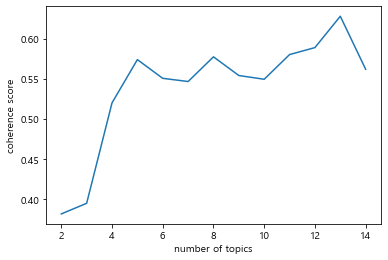

In [252]:
x=range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

### 특정 토픽 갯수에 대한 모델 만들어 내기 

In [273]:
# 위의 결과로 갯수 수정하기 
ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=13, 
                                         id2word=dictionary)

In [274]:
ldamodel.print_topics(num_words=15)

[(0,
  '0.051*"미국" + 0.034*"대통령" + 0.021*"전망" + 0.020*"인덱스" + 0.019*"실적" + 0.017*"주간" + 0.016*"금리" + 0.015*"종목" + 0.014*"이번" + 0.012*"경기" + 0.012*"코로나" + 0.012*"모닝" + 0.011*"발표" + 0.011*"테슬라" + 0.010*"주가"'),
 (1,
  '0.054*"펀드" + 0.053*"시장" + 0.053*"국내" + 0.052*"투자" + 0.046*"금융" + 0.046*"동향" + 0.046*"일일" + 0.043*"금융투자" + 0.042*"채권" + 0.040*"협회" + 0.036*"자금" + 0.032*"거래" + 0.030*"유입" + 0.023*"유출" + 0.020*"하루"'),
 (2,
  '0.032*"지수" + 0.025*"미국" + 0.019*"다우" + 0.017*"거래" + 0.016*"최고" + 0.016*"사상" + 0.014*"부양책" + 0.013*"행정부" + 0.013*"코로나" + 0.013*"하락" + 0.012*"소식" + 0.011*"코스" + 0.011*"마켓" + 0.011*"상승" + 0.010*"내년"'),
 (3,
  '0.042*"지수" + 0.033*"하락" + 0.033*"일본" + 0.032*"주요" + 0.032*"케이" + 0.029*"아시아" + 0.028*"대비" + 0.022*"거래" + 0.019*"본점" + 0.017*"전장" + 0.017*"투자" + 0.016*"우위" + 0.015*"일제" + 0.014*"상장" + 0.011*"소연"'),
 (4,
  '0.040*"국채" + 0.028*"코스닥" + 0.026*"상승" + 0.024*"개인" + 0.023*"하락" + 0.022*"기관" + 0.021*"사자" + 0.019*"외국인" + 0.018*"상위" + 0.018*"금리" + 0.015*"은행" + 0.014*"팔자" + 0.014*"지

# 토픽- 시각화 
- 원의 크기 : 토픽의 단어들이 얼마나 속해 있는가
- 원의 거리 : 멀수록 판별 타당도가 높고 주제가 뚜렷하게 구분, 토픽 간 거리가 가깝거나 겹쳐지면 판별 타당도 낮음
- 람다값 조절 : 토픽을 구성하는 단어의 출현 조건 설정, 낮을수록 각 토픽을 구성하는 단어가 뚜렷해지지만 빈도가 낮은 단어로 구성, 
                  토픽 분별력을 높이기 위해서는 낮은 빈도로 출현하는 단어들에 대한 정확한 정제 필요

In [275]:
# import pyLDAvis
# import pyLDAvis.gensim_models

In [276]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.164710 -0.116830       1        1  16.811213
8     -0.078359 -0.017638       2        1  11.933131
6     -0.152764  0.028991       3        1  10.362560
0     -0.192758  0.053588       4        1   9.340775
4      0.091671 -0.086217       5        1   6.935020
11    -0.131154  0.037561       6        1   6.777883
1      0.169692  0.319367       7        1   6.494387
2     -0.024424 -0.024723       8        1   6.412571
9      0.010050  0.021050       9        1   6.317333
12     0.069249 -0.076769      10        1   6.022689
7      0.024236 -0.060830      11        1   4.569931
5      0.031057 -0.107025      12        1   4.064832
3      0.018794  0.029475      13        1   3.957676, topic_info=    Term         Freq        Total Category  logprob  loglift
57   코스피  1705.000000  1705.000000  Default  30.0000  30.0000
55    코스  1743.000000  1743.000000  Default  29.0000  29.0000
35    금융   575.000000   575.000000  Default  28.0000  28.0000
167   시장   902.000000   902.000000  Default  27.0000  27.0000
428   일본   441.000000   441.000000  Default  26.0000  26.0000
..   ...          ...          ...      ...      ...      ...
52    리다    41.217171   297.952025  Topic13  -4.4929   1.2514
19    중국    37.045571   241.380402  Topic13  -4.5996   1.3553
34    금리    42.029405   715.725534  Topic13  -4.4734   0.3946
256   영향    36.014367   362.460068  Topic13  -4.6279   0.9205
15    보이    33.274349   519.452867  Topic13  -4.7070   0.4815

[806 rows x 6 columns], token_table=      Topic      Freq Term
term                      
144      11  0.857452   가격
144      12  0.061247   가격
429       1  0.340873  가까이
429       2  0.016232  가까이
429       5  0.016232  가까이
...     ...       ...  ...
1049     13  0.642584   휴장
1801      1  0.116586   희망
1801      2  0.116586   희망
1801     12  0.699513   희망
2435      5  0.836089   희비

[2896 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 9, 7, 1, 5, 12, 2, 3, 10, 13, 8, 6, 4])

In [277]:
pyLDAvis.save_html(vis,'LDA_TopicModeling_all2.html')

### 문장과 토픽별 설명정도 확인
### 문장 순서(숫자) 바꿔가면서 토픽 잘 설명하는 문장 확인 

In [278]:
ldamodel.get_document_topics(corpus)[100]
#몇번째[#]의 문장이 아래 나오는 결과(토픽별 설명정도)를 몇%정도 설명하는지를 나타냄 

[(0, 0.1305509), (6, 0.65010685), (12, 0.1701167)]

In [279]:
ldamodel.get_document_topics(corpus)[1]

[(8, 0.91542107)]

In [280]:
ldamodel.get_document_topics(corpus)[5]

[(4, 0.34322014), (5, 0.4995422), (9, 0.11669496)]

In [281]:
ldamodel.get_document_topics(corpus)[10]

[(1, 0.120723635),
 (6, 0.35035416),
 (9, 0.08260496),
 (10, 0.33956137),
 (11, 0.07252468)]

In [282]:
ldamodel.get_document_topics(corpus)[384]

[(1, 0.06330902), (4, 0.31741944), (5, 0.10179551), (10, 0.47418475)]

### 문장 찾았으면 아래에서 진짜 문장 확인 

In [286]:
Data_high_score["text"][7]

'마켓 차익 실현 매물 새해 첫날 후퇴 새해 개장 일인 코스피지수 차익 실현 쏟아지다 매물 하락 코스피지수 거래 일보 포인트'

In [287]:
Data_high_score["text"][200]

'마켓 합의 자다 코스피 보합 최근 거래 상승 코스피지수 보합 외국인 기관 시장 매물 쏟아내다 코스피지수 전날'

In [288]:
Data_high_score["text"][384]

'코스닥 저가 매수 나선 개미 상승 회복 개인 매다 유입 코스닥 상승 업종 상위 대부분 오르다 권효 코스닥 지수 전날 신종 코로'

# 연관어 분석 

In [289]:
from gensim.models.word2vec import Word2Vec
model=Word2Vec(high_score_reviews, sg=1, window=10, min_count=1)

In [290]:
model.init_sims(replace=True)
model.wv.most_similar("개미",topn=50)

[('동학', 0.9793605804443359),
 ('역사', 0.9204334020614624),
 ('하이닉스', 0.9069613218307495),
 ('옵션', 0.9051787853240967),
 ('널뛰기', 0.9038543701171875),
 ('배당', 0.9003911018371582),
 ('삼바', 0.8973408937454224),
 ('연고', 0.8921705484390259),
 ('귀환', 0.8899555206298828),
 ('눈앞', 0.889056384563446),
 ('마녀', 0.887300431728363),
 ('순항', 0.8864095211029053),
 ('삼전', 0.8854347467422485),
 ('삼성', 0.881298303604126),
 ('터치', 0.8810804486274719),
 ('신고', 0.8791146278381348),
 ('고공', 0.8727035522460938),
 ('전자', 0.870076060295105),
 ('롤러코스터', 0.8697644472122192),
 ('화학', 0.8697435259819031),
 ('턱밑', 0.8692149519920349),
 ('기아차', 0.8688496947288513),
 ('성전', 0.8680442571640015),
 ('기아', 0.8667815327644348),
 ('그룹', 0.8635825514793396),
 ('화전', 0.8629134893417358),
 ('롤러', 0.8623652458190918),
 ('물산', 0.8608545064926147),
 ('대량', 0.8600804805755615),
 ('천스닥', 0.8600492477416992),
 ('스닥', 0.8598100543022156),
 ('수로', 0.859193742275238),
 ('바사', 0.8590649366378784),
 ('고지', 0.8584485650062561),
 ('배터리', 0.

In [291]:
model.wv.similarity("코로나", "하락")

0.65301794